# Goal
The goal of this notebook is to find out the following things:
- Why does confidence filtering in birdhub not work?
- Why does detection size filtering in birdhug not work?

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from pathlib import Path
import datetime
import cv2
import numpy as np
from birdhub.video import ImageStore, Frame

In [2]:
from birdhub.detection import BirdDetectorYolov5

# Load a false positive video

In [3]:
video_path = r'C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings'

In [4]:
fp_video = Path(video_path) / '20240625_185657.avi'

In [5]:
# instantiate image store
image_store = ImageStore(number_images=500)

In [6]:
# load frames from video
cap = cv2.VideoCapture(str(fp_video))
frames = []
offset = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # fix color order
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ts = datetime.datetime.now() + datetime.timedelta(seconds=offset)
    image_store.put(ts, frame)
    frames.append(Frame(ts, frame))
    offset += 1

In [7]:
image_store.get(frames[0].timestamp)[::-1].shape

(720, 1280, 3)

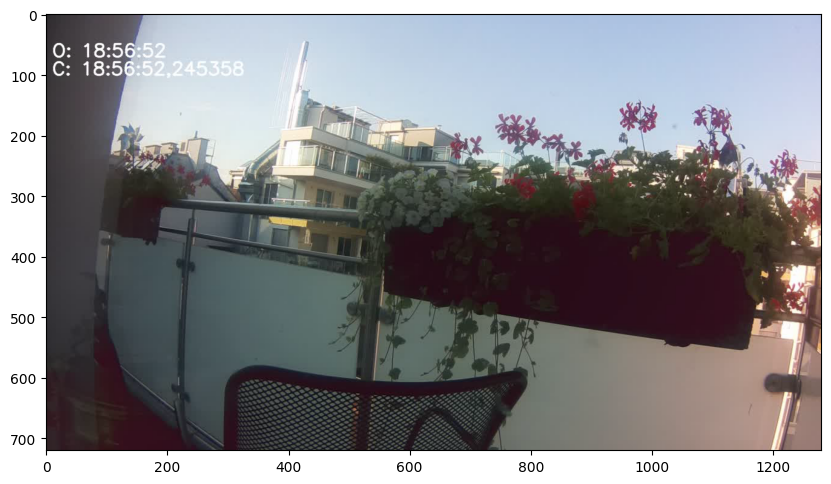

In [8]:
# show example picture
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.ascontiguousarray(image_store.get(frames[0].timestamp)).transpose(2,0,1)[::-1].transpose(1,2,0))
plt.show()

In [22]:
# run detector
#model = DetectMultiBackend(model_path, device=self._device)
detector = BirdDetectorYolov5(model_path=r'C:\Users\michael.mitter\Documents\Programming\thepigeoniator\weights\bh_v2.onnx', max_delay=50_000, confidence_threshold=0.3,
                              threshold_area=0)
detector.instantiate_model()
detector._image_store = image_store

In [23]:
# detect birds
detections = []
for frame in frames:
    detection = detector.detect(frame)
    if detection is not None:
        detections.append(detection)

In [12]:
detector.show_bbox(image_store.get(detections[0][0].frame_timestamp), detections[0][0].bboxes, detections[0][0].labels)

In [31]:
detector.show_bbox(image_store.get(detections[-1][0].frame_timestamp), detections[-1][0].bboxes, detections[-1][0].labels)

It seems that a size cut-off of ~2-3k will be useful

# Write false positives to files

In [36]:
import glob
import uuid

In [34]:
fp_videos = glob.glob(r'C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\*.avi')

In [25]:
fp_path = Path(r'C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\split_pics\false_positives')

In [41]:
for vid in fp_videos:
    print(vid)
    # instantiate image store
    image_store = ImageStore(number_images=500)

    # load frames from video
    cap = cv2.VideoCapture(str(vid))
    frames = []
    offset = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        ts = datetime.datetime.now() + datetime.timedelta(seconds=offset)
        image_store.put(ts, frame)
        frames.append(Frame(ts, frame))
        offset += 1
    print(len(frames))
    # instantiate detector
    detector = BirdDetectorYolov5(model_path=r'C:\Users\michael.mitter\Documents\Programming\thepigeoniator\weights\bh_v2.onnx', max_delay=50_000, confidence_threshold=0.3,
                              threshold_area=0)
    detector.instantiate_model()
    detector._image_store = image_store
    # detect birds
    detections = []
    for frame in frames:
        detection = detector.detect(frame)
        if detection is not None:
            detections.append(detection)

    # write images to file
    for detection in detections:
        # get image
        image = image_store.get(detection[0].frame_timestamp)
        # write to file
        cv2.imwrite(str(fp_path / f'{uuid.uuid4().hex}.jpg'), image)

C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240624_194401.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240625_133925.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240625_155231.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240625_162712.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240625_163740.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240625_164050.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\fp_vids\20240625_165125.avi
220
C:\Users\michael.mitter\Documents\Programming\thepigeoniator\train_model\raw_data\new_recordings\

# Split crow video

In [45]:
crow_video = Path(video_path) / '20240626_071555.avi'

In [46]:
# instantiate image store
image_store = ImageStore(number_images=500)

In [47]:
# load frames from video
cap = cv2.VideoCapture(str(crow_video))
frames = []
offset = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # fix color order
    #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ts = datetime.datetime.now() + datetime.timedelta(seconds=offset)
    image_store.put(ts, frame)
    frames.append(Frame(ts, frame))
    offset += 1

In [48]:
image_store.get(frames[0].timestamp)[::-1].shape

(720, 1280, 3)

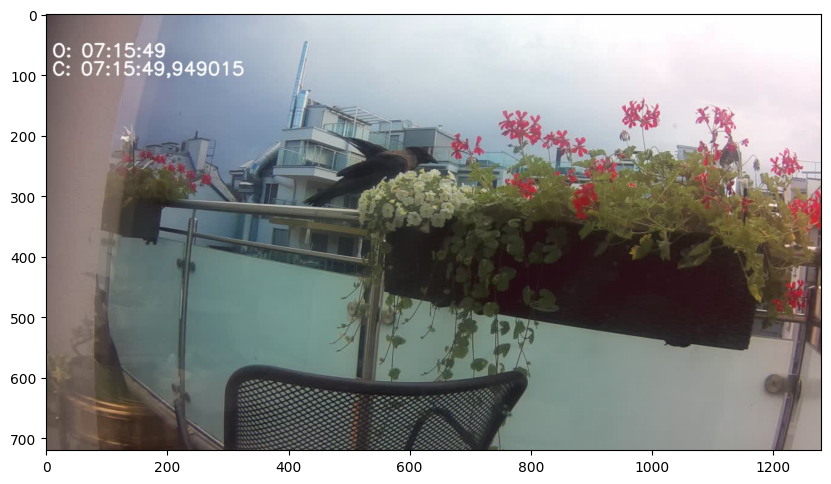

In [49]:
# show example picture
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.ascontiguousarray(image_store.get(frames[0].timestamp)).transpose(2,0,1)[::-1].transpose(1,2,0))
plt.show()

In [52]:
# run detector
#model = DetectMultiBackend(model_path, device=self._device)
detector = BirdDetectorYolov5(model_path=r'C:\Users\michael.mitter\Documents\Programming\thepigeoniator\weights\bh_v2.onnx', max_delay=50_000, confidence_threshold=0.3,
                              threshold_area=0)
detector.instantiate_model()
detector._image_store = image_store

In [53]:
# detect birds
detections = []
for frame in frames:
    detection = detector.detect(frame)
    if detection is not None:
        detections.append(detection)

In [54]:
detections

[[Detection(timestamp=2024-06-26 21:46:31.256436,
                      labels=['Crow'],
                      confidences=[0.8933752179145813],
                      meta_information={'type': 'bird detected', 'timestamp': '2024-06-26 21:46:31.256'}),
                      detection_areas=[31436.640750998806])],
 [Detection(timestamp=2024-06-26 21:46:32.266383,
                      labels=['Crow'],
                      confidences=[0.8664844632148743],
                      meta_information={'type': 'bird detected', 'timestamp': '2024-06-26 21:46:32.266'}),
                      detection_areas=[30031.82541335863])],
 [Detection(timestamp=2024-06-26 21:46:33.274164,
                      labels=['Crow'],
                      confidences=[0.8890025019645691],
                      meta_information={'type': 'bird detected', 'timestamp': '2024-06-26 21:46:33.274'}),
                      detection_areas=[30665.524962311145])],
 [Detection(timestamp=2024-06-26 21:46:34.280675,
         